In [1]:
import torch 
import numpy 
dataset_name='ogbl-ddi'
import matplotlib
import matplotlib.pyplot as plt
from ogb.linkproppred import PygLinkPropPredDataset
import torch_geometric 

dataset=PygLinkPropPredDataset(name=dataset_name)




Resources used for inspiration on code:
graph exploration from :
https://medium.com/mlearning-ai/ultimate-guide-to-graph-neural-networks-1-cora-dataset-37338c04fe6f

# Exploring our data

In [2]:
data=dataset[0]
print(f'the {dataset_name} has {len(dataset)} graph')
print(f'number of nodes:{data.num_nodes}')
print(f'number of edges {data.num_edges}')
print(f'number of features {data.num_node_features}')
print(f'is data-graph directed? :{data.is_directed()}')
print(f'data has self-loops? : {data.has_self_loops()}')
print(f'data has isolated nodes? : {data.has_isolated_nodes()}')
print('the graph has average node degree of {:.2f}'.format(data.num_edges/data.num_nodes))

the ogbl-ddi has 1 graph
number of nodes:4267
number of edges 2135822
number of features 0
is data-graph directed? :False
data has self-loops? : False
data has isolated nodes? : False
the graph has average node degree of 500.54


Data edges are given as two arrays 
array[0][i] holds the edge to array [1][i]
we look only on one array and infer the second
 

Helper functions

nx gets edges a stules


In [3]:
#returns a tensor with the indices of neighbors of the node index
def get_neighbors(edge_index,node_index):
    edge_index=edge_index
    return edge_index[:,numpy.where(edge_index[0]==node_index)[0]][1]

import networkx as nx
def visualize_nx(edges_list):
    unique_list=numpy.unique(edges_list)
    print(f'the graph has {unique_list.shape} nodes')
    myGraph=nx.Graph()
    myGraph.add_nodes_from(unique_list)
    
    myGraph.add_edges_from(list(zip(edges_list[0],edges_list[1])))
    plt.figure()
    nx.draw_networkx(myGraph,with_labels=True)

    plt.show()




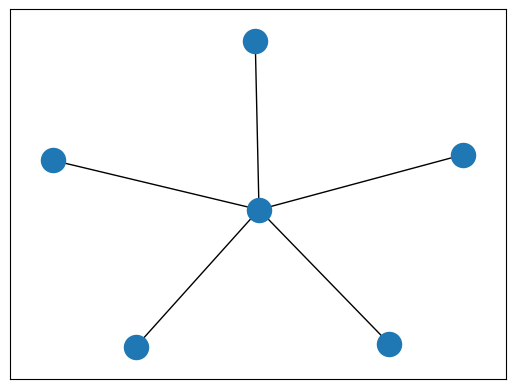

In [4]:
edges2d_t=data.edge_index
node_example_t=edges2d_t[:,numpy.where(edges2d_t[0]==4)[0]]
node_example_n=node_example_t.numpy()[:,:5]
myGraph=nx.Graph()
myGraph.add_nodes_from(numpy.unique(node_example_n))
myGraph.add_edges_from(list(zip(node_example_n[0],node_example_n[1])))



nx.draw_networkx(myGraph,with_labels=False)

In [5]:

node_example_t=edges2d_t[:,numpy.where(edges2d_t[0]==4)[0]].numpy()
node_example_t=node_example_t[:,:5]
node_example_t


array([[   4,    4,    4,    4,    4],
       [ 225, 1182,  738, 2760,  755]], dtype=int64)

In [6]:
%%script echo skipping
myGraph=nx.Graph()
myGraph.add_nodes_from(data.edge_index[0])
myGraph.add_edges_from(list(zip(data.edge_index[0],data.edge_index[1])))

Couldn't find program: 'echo'


In [7]:
import pandas 
def draw_degree_histogram(data):
    myGraph=nx.to_networkx_graph(list(zip(data[0].numpy(),data[1].numpy())))
    degrees=[val for (node,val) in myGraph.degree()]
    
    plt.hist(degrees,bins=range(0,max(degrees)+1))
    ax=plt.gca()
    plt.xlabel("# of interactions per drug (degree)")
    ax.set_ylim([0,30])
    plt.show()
    print(pandas.DataFrame(degrees).describe().transpose().round(3))



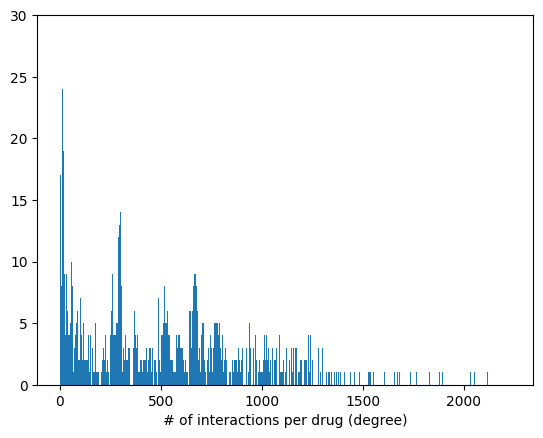

    count     mean      std  min    25%    50%    75%     max
0  4267.0  500.544  420.527  1.0  109.5  446.0  770.0  2234.0


In [8]:
draw_degree_histogram(data.edge_index)

In [9]:
from pylab import rcParams
def draw_most_important(data):
    myGraph=nx.to_networkx_graph(list(zip(data[0].numpy(),data[1].numpy())))
    
    color_lookup={node:degree for node,degree in sorted(myGraph.degree())}
    print(color_lookup)

In [10]:
myGraph=nx.to_networkx_graph(list(zip(data.edge_index[0].numpy(),data.edge_index[1].numpy())))
node_degree_sequence=numpy.array(object= sorted({(n,d) for (n,d) in myGraph.degree()},reverse=True,key=lambda x:x[1]))
node_degree_sequence[:10]

array([[ 807, 2234],
       [ 406, 2219],
       [1037, 2118],
       [ 299, 2091],
       [ 260, 2091],
       [ 485, 2054],
       [1029, 2035],
       [ 431, 2034],
       [ 390, 2026],
       [ 808, 1973]], dtype=int64)

In [11]:
low,high=node_degree_sequence[:,1].min(),node_degree_sequence[:,1].max()
print(f'low degree:{low}, high degree:{high}')

low degree:1, high degree:2234


node 5 has degree 816


KeyboardInterrupt: 

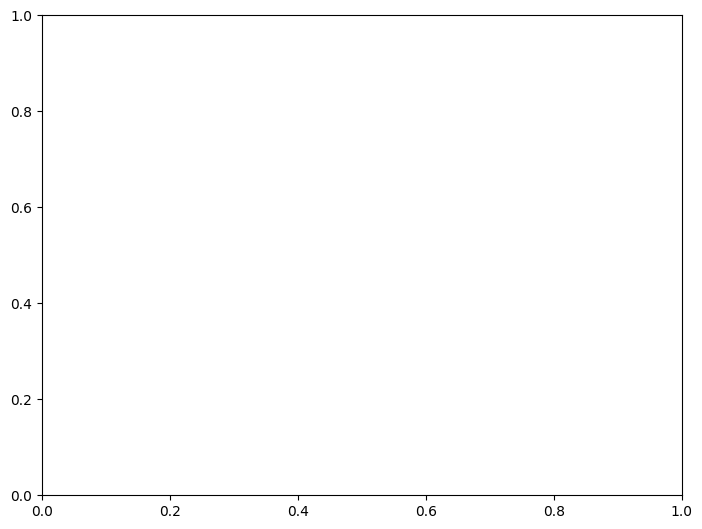

In [12]:
node1=5
degreenode1=myGraph.degree(node1)
print(f'node {node1} has degree {degreenode1}')

nx.draw(
    G=myGraph,
    nodelist=[node1],
    node_color='red',
    with_labels=False,
)
plt.show()

threshold:0.45405532114392877


c:\Users\pchrk\OneDrive\Desktop\pms cs\NLP\NLP\nlp_venv\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


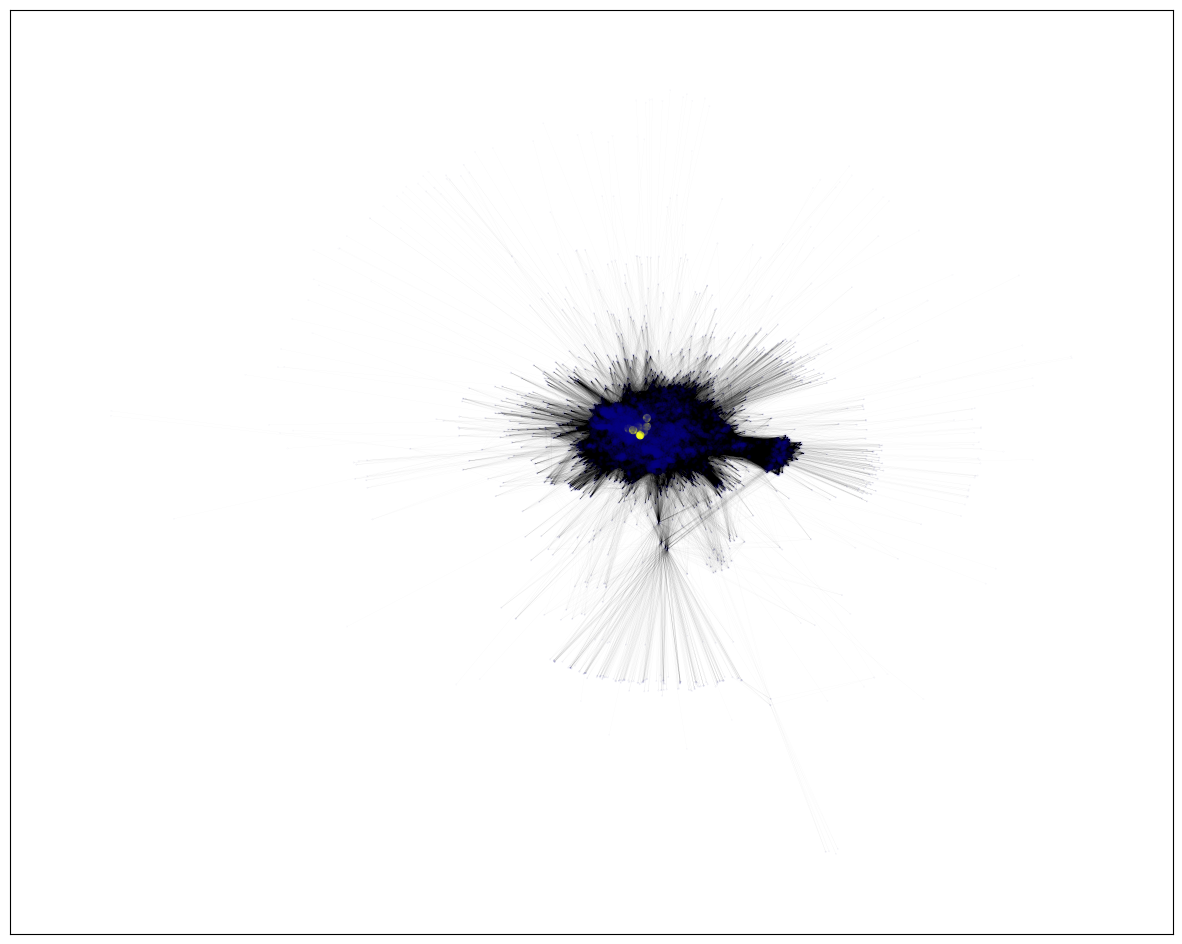

In [15]:
pos=nx.spring_layout(myGraph)
cent=nx.degree_centrality(myGraph)
node_size=list(map(lambda x:x*50,cent.values()))
cent_array=numpy.array(list(cent.values()))
threshold=sorted(cent_array,reverse=True)[10]
print(f'threshold:{threshold}')
cent_bin=numpy.where(cent_array>threshold,1,0.1)
plt.figure(figsize=(15,12))
nodes=nx.draw_networkx_nodes(
    G=myGraph,
    pos=pos,
    node_size=node_size,
    cmap=plt.cm.plasma,
    nodelist=list(cent.keys()),
    alpha=cent_bin,
    node_color=cent_bin

)
edges=nx.draw_networkx_edges(
    G=myGraph,
    pos=pos,
    width=0.03, alpha=0.2
)

## Get the sparse matrix version of the data.

We use ToSparseTensor to get a Tensor object with key adj_t

In [ ]:
dataset_sparse=PygLinkPropPredDataset(name='ogbl-ddi', transform=torch_geometric.transforms.ToSparseTensor())
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
data_sparse=dataset_sparse[0]
adj_t=data_sparse.adj_t.to(device)
type(adj_t)

c:\Users\pchrk\OneDrive\Desktop\pms cs\NLP\NLP\nlp_venv\lib\site-packages\torch_geometric\utils\sparse.py:176: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ..\aten\src\ATen\SparseCsrTensorImpl.cpp:56.)
  return adj.to_sparse_csr()


torch.Tensor

In [ ]:
split_edge=dataset.get_edge_split()
split_edge.items()

dict_items([('train', {'edge': tensor([[4039, 2424],
        [4039,  225],
        [4039, 3901],
        ...,
        [ 647,  708],
        [ 708,  338],
        [ 835, 3554]])}), ('valid', {'edge': tensor([[ 722,  548],
        [ 874, 3436],
        [ 838, 1587],
        ...,
        [3661, 3125],
        [3272, 3330],
        [1330,  776]]), 'edge_neg': tensor([[   0,   58],
        [   0,   84],
        [   0,   90],
        ...,
        [4162, 4180],
        [4168, 4260],
        [4180, 4221]])}), ('test', {'edge': tensor([[2198, 1172],
        [1205,  719],
        [1818, 2866],
        ...,
        [ 326, 1109],
        [ 911, 1250],
        [4127, 2480]]), 'edge_neg': tensor([[   0,    2],
        [   0,   16],
        [   0,   42],
        ...,
        [4168, 4259],
        [4208, 4245],
        [4245, 4259]])})])

# Initial Features and Benchmark
## Topological similarity features
1. common neighbors
2. Jaccard's coefficient
3. Adamic/adar
4. Preferential attachment


In [19]:
data=dataset[0]
Graph_total=nx.to_networkx_graph(list(zip(data.edge_index[0].numpy(), data.edge_index[1].numpy())))
pagerank_f=nx.pagerank(Graph_total, alpha=0.85)
clustering_coef_f=nx.clustering(Graph_total)
# adamic_adar_f=nx.adamic_adar_index(Graph_total)
# betweenness_f=nx.betweenness_centrality(Graph_total)




In [33]:
clustering_coef_f=nx.clustering(Graph_total)

In [38]:
betweenness_f=nx.betweenness_centrality(Graph_total)

In [31]:
# saves to a txt file afeture in the form of node_number:feature
def save_to_txt(filename, data):
    with open(filename+".txt", "w") as myfile:
        for key, value in sorted(data.items()):
            myfile.write(str(key) + ' ' + str(value) + '\n')

In [ ]:

feutures_emb=torch.ones(data.num_nodes,10, dtype=torch.float64).to(device)
for _ in range(data.num_nodes):
    features_emb[_][0]=pagerank_f[_]
    features_emb[_][1]=clustering_coef_f[_]
    features_emb[_][2]=betweenness_f[_]


[(4039, 0.00039207858163158634),
 (2424, 0.0002169788685233194),
 (225, 0.0005206100336553317),
 (3901, 0.0003107291908181226),
 (223, 0.00043893906224875764),
 (511, 0.0005546232450105348),
 (1150, 0.00024765931257907743),
 (3832, 0.00030499959925496805),
 (346, 0.0003980308967630406),
 (2336, 0.00033107395771088556)]

In [39]:
save_to_txt("betweeness_centrality", betweenness_f)